In [ ]:
#52. What is a Category data type?

In [1]:
import pandas as pd
import os

In [ ]:
os.getcwd()

In [2]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [ ]:
movies.head()

In [ ]:
len(movies)

In [ ]:
movies.info()

In [3]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [ ]:
movies.describe()

In [4]:
#Change categories

movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [ ]:
movies.Genre.cat.categories #unique()

In [ ]:
movies.describe()

In [ ]:
#53. Working with JointPlots

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Jointplots

In [ ]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind="hex")

In [ ]:
j = sns.jointplot(data=movies, y='CriticRating', x='BudgetMillions', kind="hex")

In [ ]:
movies[movies.BudgetMillions > 200]

In [ ]:
j = sns.jointplot(data=movies, x='AudienceRating', y='BudgetMillions', kind='hex')

---

In [ ]:
#54. Histograms

In [ ]:
m1 = sns.distplot(movies.AudienceRating, bins=20)

In [ ]:
m2 = sns.distplot(movies.CriticRating, bins=20)

In [ ]:
sns.set_style("white")
n1 = plt.hist(movies.AudienceRating, bins=20)

In [ ]:
sns.set_style("darkgrid")
n1 = plt.hist(movies.CriticRating, bins=20)

---

In [ ]:
#55. Stacked histograms in Python

In [12]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

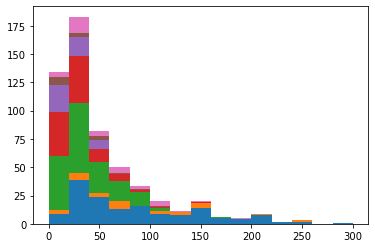

In [29]:
#Not ideal
plt.hist([movies[movies.Genre == "Action"].BudgetMillions, 
          movies[movies.Genre == "Adventure"].BudgetMillions, 
          movies[movies.Genre == "Comedy"].BudgetMillions, 
          movies[movies.Genre == "Drama"].BudgetMillions, 
          movies[movies.Genre == "Horror"].BudgetMillions, 
          movies[movies.Genre == "Romance"].BudgetMillions, 
          movies[movies.Genre == "Thriller"].BudgetMillions], 
          bins=15, stacked=True)
plt.show()

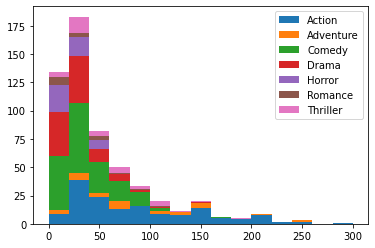

In [51]:
#Using a loop

l1 = []
labels = []

for i in movies.Genre.cat.categories:
    l1.append(movies[movies.Genre == i].BudgetMillions)
    labels.append(i)
    
h1 = plt.hist(l1, stacked=True, bins=15, label=labels)
plt.legend()
plt.show()

---

In [52]:
#56. Creating a KDE Plot

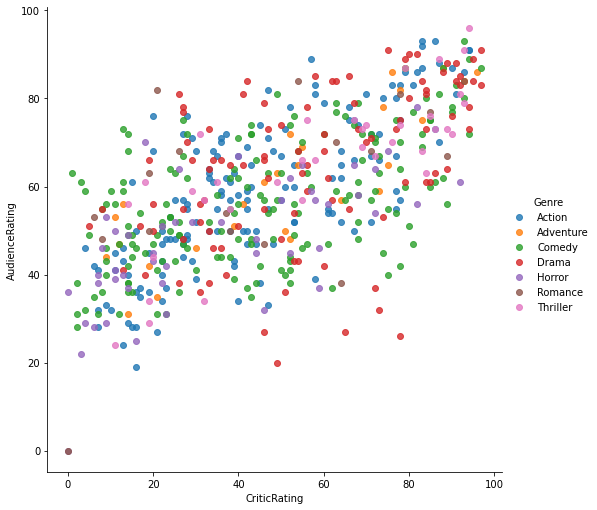

In [56]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', size=7, aspect=1)

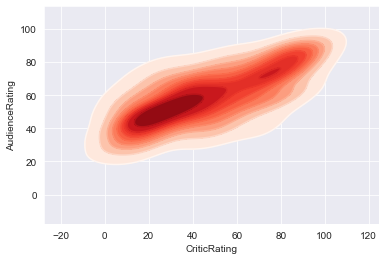

In [67]:
#sns.set_style("darkgrid")
k1a = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')

#Tip: shade and outline overlay in order to look better
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')

In [68]:
#57. Working with Subplots()

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

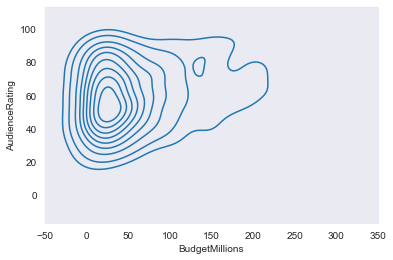

In [71]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

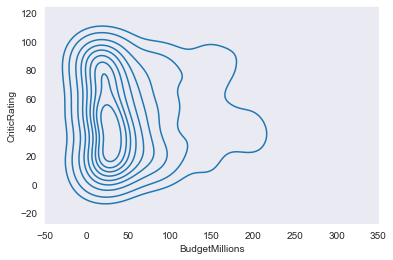

In [72]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

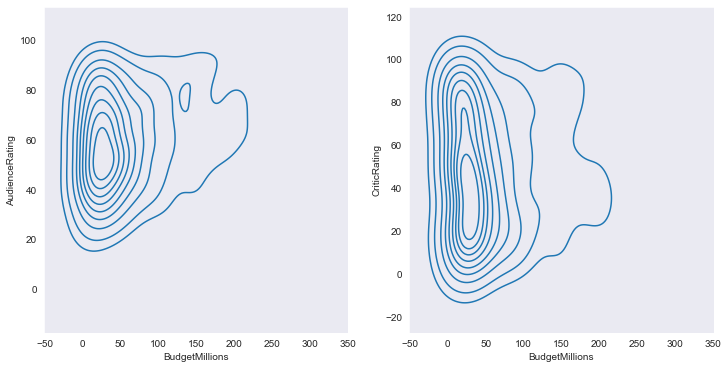

In [79]:
#for 1 dimensional array 
f, axes = plt.subplots(1, 2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])

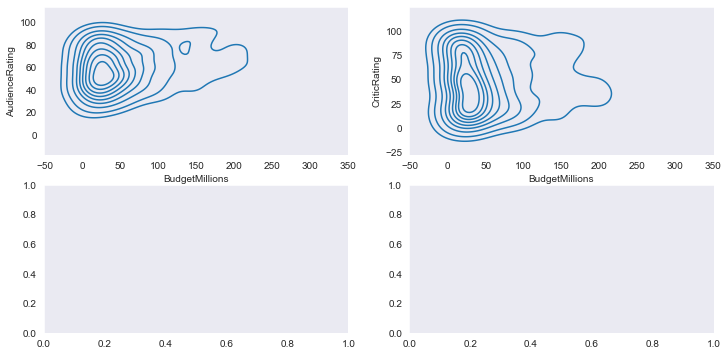

In [87]:
#for 2 dimensional array 
f, ax = plt.subplots(2, 2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[0,1])

[(-50.0, 250.0)]

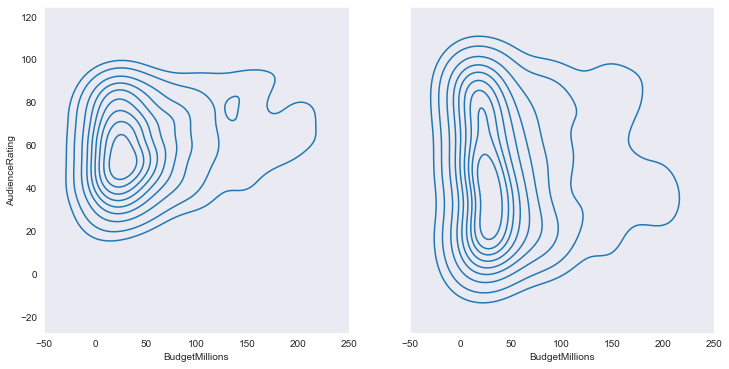

In [94]:
f, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[1])
k1.set(xlim=(-50, 250))